# Download Dataset

In [41]:
!wget https://raw.githubusercontent.com/fendy07/chatbot-AI/master/kampus_merdeka.json

--2024-06-13 03:58:42--  https://raw.githubusercontent.com/fendy07/chatbot-AI/master/kampus_merdeka.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16366 (16K) [text/plain]
Saving to: ‘kampus_merdeka.json.4’

kampus_merdeka.json 100%[===================>]  15.98K  --.-KB/s    in 0s      

2024-06-13 03:58:42 (71.2 MB/s) - ‘kampus_merdeka.json.4’ saved [16366/16366]



In [ ]:
# Import Libraries
import json
import nltk
import random
import string
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from joblib import dump
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.models import Model
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Input, Embedding, LSTM, Flatten, Dense, GlobalMaxPool1D
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

In [ ]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.9.5
aiosignal                        1.3.1
alabaster                        0.7.16
albumentations                   1.3.1
altair                           4.2.2
annotated-types                  0.7.0
anyio                            3.7.1
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array_record                     0.5.1
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.1.0
attrs                            23.2.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.15.0
backcall                         0.2.0
beautifulsoup4                   4.12.3
bidict                           0.23.1

# Download Packages

In [ ]:
# package for tokenizing data
nltk.download('punkt')

# package for lemmatization
nltk.download('wordnet')

# package for multilingual wordnet
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

# 1. Read Data

In [ ]:
# Importing the dataset
# DO: Masukkan path file data kampus_merdeka.json
with open('/content/CHATBOT.json' ) as content:
  data1 = json.load(content)

# Mendapatkan semua data ke dalam list
tags = []
inputs = []
responses = {}
words = []
classes = []
documents = []
ignore_words = ['?', '!']


for intent in data1['intents']:
  # Mengumpulkan semua response
  responses[intent['tag']]= intent['responses']

  # Mengumpulkan semua patterns dan tags
  for lines in intent['patterns']:
    inputs.append(lines)
    tags.append(intent['tag'])

    for pattern in intent['patterns']:
      w = nltk.word_tokenize(pattern)
      words.extend(w)


# Konversi data json ke dalam dataframe
data = pd.DataFrame({"patterns": inputs, "tags": tags})

In [ ]:
# DO: Menampilkan data index ke-15 sampai 19
data

,patterns,tags
0,bye,goodbye
1,goodbye,goodbye
2,see you later!,goodbye
3,see ya,goodbye
4,hallo,
...,...,...
273,Proyek pengembangan aplikasi yang mendesak,pembangunan_aplikasi_mendadak
274,Uang terselip,uang_terselip
275,Terselip uang di aplikasi,uang_terselip
276,Masalah dengan uang di aplikasi,uang_terselip


# 2. Data Preprocessing

## Removing Punctuation

In [ ]:
# Character punctuation
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
# Mengubah data ke format huruf kecil dan menghilangkan punctuation
# DO: Masukkan kolom 'patterns' untuk dilakukan punctuation
data['patterns'] = data['patterns'].apply(lambda word:[letters.lower() for letters in word if letters not in string.punctuation])
data['patterns'] = data['patterns'].apply(lambda word: ''.join(word))

# Menampilkan hasil
data[15 : 20]

,patterns,tags
15,malam,
16,bro,
17,sis,
18,kawan,
19,selamat pagi,


## Tokenizer

In [ ]:
# Tokenize the data
# DO: Atur num_words sebanyak 2000
tokenizer = Tokenizer(num_words= 2000 )

# DO: Masukkan kolom patterns kedalam fit_on_texts
tokenizer.fit_on_texts(data['patterns'])
# DO: Masukkan kolom patterns kedalam texts_to_sequences
tokenized_data = tokenizer.texts_to_sequences( data['patterns'])

# Menampilkan data ke-15 sampai ke-20
print('Sebelum dilakukan tokenisasi:\n')
print(data['patterns'][15 : 20])

# Menampilkan hasil tokenisasi data ke-15 sampai ke-20
print('\n\nSesudah dilakukan tokenisasi:\n')
print(tokenized_data[15 : 20])

Sebelum dilakukan tokenisasi:

15           malam
16             bro
17             sis
18           kawan
19    selamat pagi
Name: patterns, dtype: object


Sesudah dilakukan tokenisasi:

[[135], [182], [183], [184], [82, 132]]


## Padding

In [ ]:
# Melakukan padding terhadap hasil tokenisasi
# DO: Masukkan hasil tokenisasi kedalam pad_sequences
x_train = pad_sequences(tokenized_data )

# Menampilkan hasil padding
print('Hasil padding:\n')
print(x_train[15:20])

Hasil padding:

[[  0   0   0   0   0   0   0   0   0 135]
 [  0   0   0   0   0   0   0   0   0 182]
 [  0   0   0   0   0   0   0   0   0 183]
 [  0   0   0   0   0   0   0   0   0 184]
 [  0   0   0   0   0   0   0   0  82 132]]


## Encoding Label

In [ ]:
# Encoding the label
# DO: Panggil fungsi LabelEncoder()
le = LabelEncoder()

# DO: Masukkan kolom tags sebagai label data ke dalam fit_transform
y_train = le.fit_transform(data['tags'])

# Menampilkan label sebelum di-encoding
print('Label sebelum di-encoding:\n')
print(data['tags'])

# Menampilkan label setelah di-encoding
print('\n\nLabel setelah di-encoding:\n')
print(y_train)

Label sebelum di-encoding:

0                            goodbye
1                            goodbye
2                            goodbye
3                            goodbye
4                                   
                   ...              
273    pembangunan_aplikasi_mendadak
274                    uang_terselip
275                    uang_terselip
276                    uang_terselip
277                    uang_terselip
Name: tags, Length: 278, dtype: object


Label setelah di-encoding:

[11 11 11 11  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 19
 19 19 19 19 19 19 45 45 45 45 45  1  1  1  1  1  1  1  1  1  1  1 29 29
 29 29 29 29 29 29 23 23 23 23 23 23 23 23 23 23 17 17 17 17 17 17 16 16
 16 16 16 16 20 20 20 20 20 20 42 42 42 42 42 42 15 15 15 15 15 15 33 33
 33 33 33 33 36 36 36 36 36 36 37 37 37 37 37 37 38 38 38 38 38 38 38 38
 38 38 38 38 39 39 39 39 39 39 27 27 27 27 27 26 26 26 26 26 32 32 32 32
 28 28 28 28 28 40 40 40 40 40 40 25 25 25 25 25  5  5  5 

# 3. Modelling and Evaluation

## Defining Input and Output

In [ ]:
# Menentukan input shape
input_shape = x_train.shape[1]
print('input shape:', input_shape)

# Menentukan jumlah vocab
vocabulary = len(tokenizer.word_index)
print("number of unique words : ", vocabulary)

# Menentukan panjang output
output_length = le.classes_.shape[0]
print("output length: ", output_length)

input shape: 10
number of unique words :  272
output length:  48


## Build Model

In [ ]:
# Membuat Input layer
input_layer = Input(shape=(input_shape,))

# Membuat Hidden layer
layer = Embedding(vocabulary+1,10)(input_layer)
layer = LSTM(10, return_sequences=True)(layer)
layer = Flatten()(layer)

# Membuat Output layer
layer = Dense(output_length, activation="softmax")(layer)

# DO: Gabungkan input_layer dan layer kedalam fungsi Model!
model  = Model(input_layer ,layer )

# Compiling the model
model.compile(loss="sparse_categorical_crossentropy", optimizer='adam', metrics=['accuracy'])

## Training
Data yang dibutuhkan untuk training adalah data hasil preprocessing dan data label hasil encoding

In [ ]:
# Melakukan training
# DO: Masukkan data yang akan ditraining (data hasil padding dan data hasil label encoding) dan atur epochs = 200!
train = model.fit( x_train, y_train, epochs=400)

Epoch 1/400
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.0167 - loss: 3.8717
Epoch 2/400
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0392 - loss: 3.8643 
Epoch 3/400
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0626 - loss: 3.8544 
Epoch 4/400
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0926 - loss: 3.8373 
Epoch 5/400
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0636 - loss: 3.8233 
Epoch 6/400
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0773 - loss: 3.7799  
Epoch 7/400
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0664 - loss: 3.7660 
Epoch 8/400
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0757 - loss: 3.7312 
Epoch 9/400
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0906 - loss: 3.6955 
Epoch 10/400
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0677 - loss: 3.6942     
Epoch 11/400
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0857 - loss: 3.6622
Epoch 12/400
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1031 - 

## Evaluation

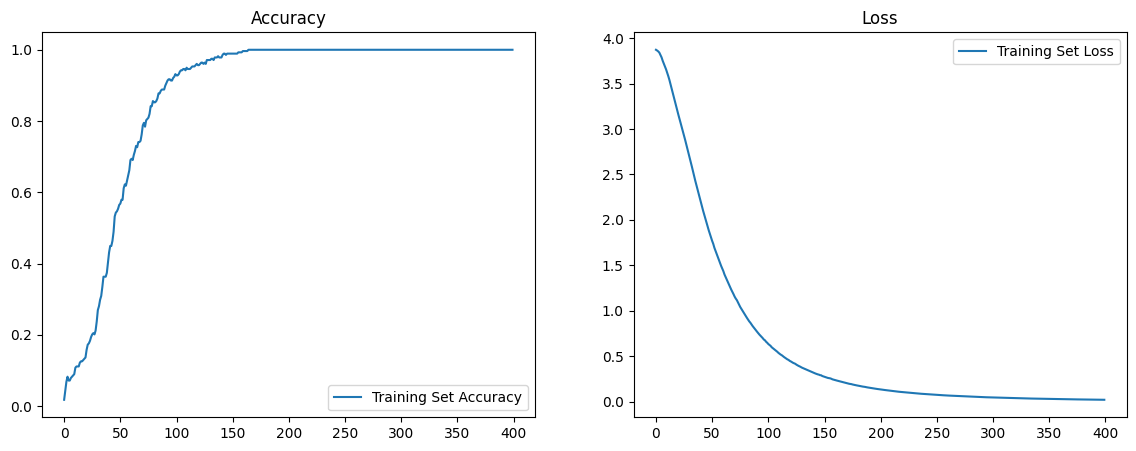

In [ ]:
# Plot Akurasi
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(train.history['accuracy'],label='Training Set Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(train.history['loss'],label='Training Set Loss')
plt.legend(loc='upper right')
plt.title('Loss')
plt.show()

## TESTING

In [ ]:
from nltk.translate.gale_church import LanguageIndependent
while True:
  texts_p = []
  prediction_input = input('Kamu : ')

  # Menghapus punktuasi dan konversi ke huruf kecil
  prediction_input = [letters.lower() for letters in prediction_input if letters not in string.punctuation]
  prediction_input = ''.join(prediction_input)
  texts_p.append(prediction_input)

  # Tokenisasi dan Padding
  prediction_input = tokenizer.texts_to_sequences(texts_p)
  prediction_input = np.array(prediction_input).reshape(-1)
  prediction_input = pad_sequences([prediction_input],input_shape)

  # Mendapatkan hasil keluaran pada model
  output = model.predict(prediction_input)
  output = output.argmax()

  # Menemukan respon sesuai data tag dan memainkan voice bot
  response_tag = le.inverse_transform([output])[0]
  print("Helpdeskbot : ", random.choice(responses[response_tag]))
  if response_tag == "goodbye":
    break

Kamu : hai
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
Helpdeskbot :  Helo! Ini Helpdesak Bank UMKM, ada yang bisa saya bantu?
Kamu : uang terselip
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Helpdeskbot :  Jika Anda mengalami masalah dengan uang yang terselip di aplikasi, berikut adalah langkah-langkah yang dapat Anda ambil:

1. Periksa riwayat transaksi Anda untuk mencari tahu apakah ada transaksi yang belum selesai atau tertunda.
2. Pastikan bahwa saldo atau dana di aplikasi Anda mencerminkan transaksi terakhir yang telah Anda lakukan.
3. Jika uang masih belum tersedia, coba lakukan refresh atau muat ulang aplikasi untuk memperbarui informasi saldo.
4. Jika masalah masih berlanjut, hubungi layanan pelanggan atau dukungan teknis dari penyedia aplikasi untuk mendapatkan bantuan lebih lanjut.

Tim dukungan akan membantu Anda menyelesaikan masalah dan memastikan bahwa uang yang terselip dapat diakses atau ditangani dengan tepat.
Kamu : bye
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Helpdeskbot :  goodb


## SAVE MODEL


In [ ]:
# Save the model
model.save('/content/chatbot_model.h5')


In [ ]:
model.save('CHATBOT.keras')

## SAVE TOKENIZER

In [ ]:
# Simpan Tokenizer
dump(tokenizer, 'tokenizer.joblib')

['tokenizer.joblib']

In [ ]:
# Simpan Label Encoder
dump(le, 'labelencoder.joblib')

['labelencoder.joblib']